# **Human Resources Data Set**

https://www.kaggle.com/datasets/rhuebner/human-resources-data-set

We have reduced the complexity of the dataset down to a single data file (v14). The CSV revolves around a fictitious company and the core data set contains names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, and performance score.

Recent additions to the data include:

    Absences
    Most Recent Performance Review Date
    Employee Engagement Score

    
Inspiration

We've included some open-ended questions that you can explore and try to address through 
creating Tableau visualizations, or R or Python analyses. Good luck and enjoy the learning!

    1. Is there any relationship between who a person works for and their performance score?
    2. What is the overall diversity profile of the organization?
    3. What are our best recruiting sources if we want to ensure a diverse organization?
    4. Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?
    5. Are there areas of the company where pay is not equitable?

There are so many other interesting questions that could be addressed through this interesting data 
set. Dr. Patalano and I look forward to seeing what we can come up with.

If you have any questions or comments about the dataset, please do not hesitate to reach out to me on LinkedIn:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from dython.nominal import associations

# **Loading and reading the dataset**

In [15]:
hr = pd.read_csv("HRDataset_v14.csv")
hr

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [16]:
# check shape and info
print(hr.info())
print(hr.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# **Lets do some exploratory data analysis**

In [93]:
attrition  = hr.loc[:, ["ManagerName","Salary","PerformanceScore","EngagementSurvey","Absences"]]
attrition.head()

,ManagerName,Salary,PerformanceScore,EngagementSurvey,Absences
0,Michael Albert,62506,Exceeds,4.60,1
1,Simon Roup,104437,Fully Meets,4.96,17
2,Kissy Sullivan,64955,Fully Meets,3.02,3
3,Elijiah Gray,64991,Fully Meets,4.84,15
4,Webster Butler,50825,Fully Meets,5.00,2


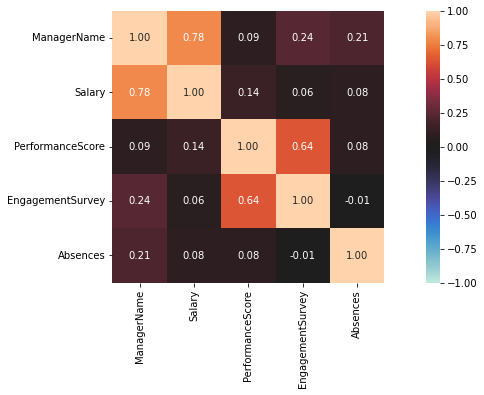

{'corr':                   ManagerName    Salary  PerformanceScore  EngagementSurvey  \
 ManagerName          1.000000  0.783088          0.085846          0.241635   
 Salary               0.783088  1.000000          0.140372          0.064966   
 PerformanceScore     0.085846  0.140372          1.000000          0.635053   
 EngagementSurvey     0.241635  0.064966          0.635053          1.000000   
 Absences             0.209300  0.082382          0.082562         -0.008771   
 
                   Absences  
 ManagerName       0.209300  
 Salary            0.082382  
 PerformanceScore  0.082562  
 EngagementSurvey -0.008771  
 Absences          1.000000  ,
 'ax': <AxesSubplot:>}

In [58]:
fig,ax= plt.subplots(figsize =(15,5))
associations(attrition, ax=ax)

In [82]:
att_salary = attrition.groupby('ManagerName').agg('mean').sort_values('Salary')

In [83]:
att_salary.head()

,Salary,EngagementSurvey,Absences
ManagerName,,,
Ketsia Liebig,56936.666667,4.047619,9.142857
David Stanley,56938.571429,4.150952,10.380952
Kissy Sullivan,57183.818182,4.039091,10.590909
Webster Butler,57381.238095,4.325238,11.857143
Amy Dunn,57881.857143,3.924762,9.523810


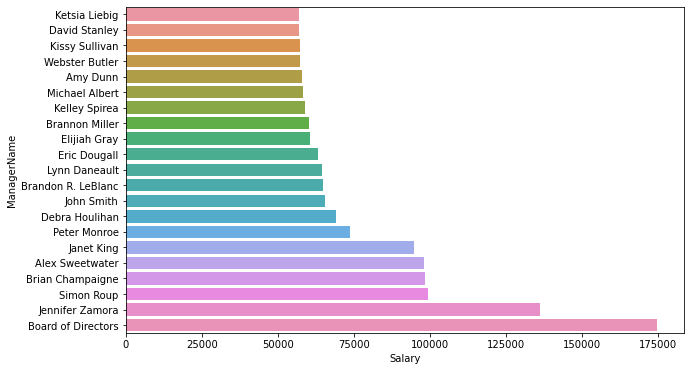

In [84]:
# Lets plot to view averge salary by manager
fig,ax = plt.subplots(figsize = (10,6), nrows= 1, ncols =1)
sns.barplot(data = att, y = att_salary.index, x = att_salary.Salary);

# Employees managed by BOARS OF DIRECTORS SEEM TO EARN MORE ON THE AVERAGE

In [98]:
per = hr.loc[:,["Employee_Name","ManagerName","EngagementSurvey",\
"PerformanceScore","Absences","Salary",'DeptID']].sort_values('EngagementSurvey')
per

,Employee_Name,ManagerName,EngagementSurvey,PerformanceScore,Absences,Salary,DeptID
69,"Desimone, Carl",Amy Dunn,1.12,PIP,9,53189,5
91,"Fett, Boba",Peter Monroe,1.20,PIP,2,53366,3
90,"Fernandes, Nilson",Amy Dunn,1.56,PIP,15,64057,5
267,"Stansfield, Norman",Lynn Daneault,1.81,PIP,5,58273,6
67,"Delarge, Alex",John Smith,1.93,PIP,5,61568,6
...,...,...,...,...,...,...,...
59,"Cross, Noah",Peter Monroe,5.00,Fully Meets,5,92329,3
210,"Ozark, Travis",John Smith,5.00,Fully Meets,18,68829,6
119,"Gross, Paula",Kelley Spirea,5.00,Fully Meets,17,63813,5
160,"LaRotonda, William",Brandon R. LeBlanc,5.00,Fully Meets,3,64520,1


In [99]:
per.corr()

,EngagementSurvey,Absences,Salary,DeptID
EngagementSurvey,1.000000,-0.008771,0.064966,-0.094940
Absences,-0.008771,1.000000,0.082382,0.053308
Salary,0.064966,0.082382,1.000000,-0.448132
DeptID,-0.094940,0.053308,-0.448132,1.000000


C:\Users\godwi\anaconda3\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(
C:\Users\godwi\anaconda3\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(


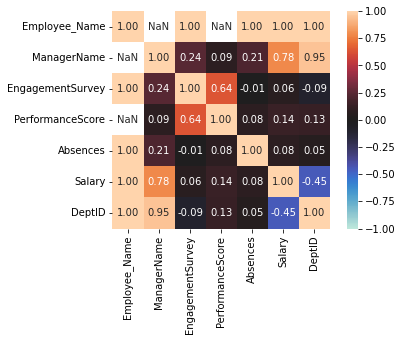

{'corr':                   Employee_Name  ManagerName  EngagementSurvey  \
 Employee_Name               1.0     0.000000          1.000000   
 ManagerName                 0.0     1.000000          0.241635   
 EngagementSurvey            1.0     0.241635          1.000000   
 PerformanceScore            0.0     0.085846          0.635053   
 Absences                    1.0     0.209300         -0.008771   
 Salary                      1.0     0.783088          0.064966   
 DeptID                      1.0     0.950627         -0.094940   
 
                   PerformanceScore  Absences    Salary    DeptID  
 Employee_Name             0.000000  1.000000  1.000000  1.000000  
 ManagerName               0.085846  0.209300  0.783088  0.950627  
 EngagementSurvey          0.635053 -0.008771  0.064966 -0.094940  
 PerformanceScore          1.000000  0.082562  0.140372  0.130920  
 Absences                  0.082562  1.000000  0.082382  0.053308  
 Salary                    0.140372  0.082382 

In [100]:
associations(per)

# **1. Is there any relationship between who a person works for and their performance score?**

In [150]:
score_num = []
for i in hr['PerformanceScore'].values:
    if i == 'Fully Meets':
        score_num.append(3)
    elif i == 'Exceeds' :
        score_num.append(2)
    elif i == 'Needs Improvement' :
        score_num.append(1)
    else:
        score_num.append(0)

In [151]:
hr['Score_num'] = score_num

In [154]:
hr.head(2)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Score_num
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,2
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,3


In [176]:
man_per = hr.loc[:,['Employee_Name','ManagerName','PerformanceScore','Score_num']].sort_values('Score_num')

In [178]:
man_per

,Employee_Name,ManagerName,PerformanceScore,Score_num
83,"Erilus, Angela",Michael Albert,PIP,0
95,"Forrest, Alex",Lynn Daneault,PIP,0
91,"Fett, Boba",Peter Monroe,PIP,0
90,"Fernandes, Nilson",Amy Dunn,PIP,0
205,"O'hare, Lynn",Kissy Sullivan,PIP,0
...,...,...,...,...
117,"Goyal, Roxana",Kissy Sullivan,Fully Meets,3
116,"Gosciminski, Phylicia",Kissy Sullivan,Fully Meets,3
115,"Gordon, David",David Stanley,Fully Meets,3
121,"Guilianno, Mike",John Smith,Fully Meets,3


In [250]:
#plot to show
m = man_per.groupby('Employee_Name').sum()
n = man_per.loc[:,['Employee_Name','ManagerName']]
mn = pd.merge(m,n,left_on ='Employee_Name', right_on = 'Employee_Name' )

In [266]:
mn

,Employee_Name,Score_num,ManagerName
0,"Adinolfi, Wilson K",2,Michael Albert
1,"Ait Sidi, Karthikeyan",3,Simon Roup
2,"Akinkuolie, Sarah",3,Kissy Sullivan
3,"Alagbe,Trina",3,Elijiah Gray
4,"Anderson, Carol",3,Webster Butler
...,...,...,...
306,"Woodson, Jason",3,Kissy Sullivan
307,"Ybarra, Catherine",0,Brannon Miller
308,"Zamora, Jennifer",2,Janet King
309,"Zhou, Julia",3,Simon Roup
